<a href="https://colab.research.google.com/github/hijera/NN_colab_hw/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%BF%D0%BE_%D0%A2%D0%B5%D0%BC%D0%B5_%22%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D1%83%D1%8E_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D1%83_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0%22_(%D0%92%D0%BB%D0%B0%D1%81%D0%BE%D0%B2_%D0%90%D0%BD%D1%82%D0%BE%D0%BD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [ ]:
!python --version

Python 3.10.9


In [ ]:
!pip install --upgrade nltk

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install pymorphy2

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
df = pd.read_json("banki_responses.json", lines=True)

# Print DataFrame
df.head()

,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade
0,г. Воронеж,True,Ипотека на 5+,0,лицензия № 1623,e.novikova,ВТБ 24,2015-06-08 11:06:56,Здравствуйте! Хотелось бы выразить благодарно...,5.0
1,г. Казань,True,ЗВОНКИ СОСЕДЯМ,0,лицензия № 2289,KZN\Vorontsova_NA,Русский Стандарт,2015-06-06 18:17:52,Уважаемые представители департамента по работе...,2.0
2,г. Санкт-Петербург,True,Ложная информация!!!!,0,лицензия № 2307,Evgenia15,Союз,2015-06-07 19:08:33,Здравствуйте. Столкнулась с такой ситуацией. в...,2.0
3,г. Москва,True,Банкомат не зачислил деньги на счет,1,лицензия № 2557,dolgov.work,Ситибанк,2015-06-07 19:22:00,1 июня 2015 в Москве в отделении по адресу Смо...,1.0
4,г. Волгоград,True,Невозможно закрыть карту 2(два)!!!,0,лицензия № 3354,copLine,Ренессанс Кредит,2015-06-08 14:54:55,История очень долгая! Пришел я в банк (это раз...,1.0


In [ ]:
import re
from nltk.corpus import stopwords
from string import punctuation
from tqdm import tqdm

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201030 entries, 0 to 201029
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   city                185492 non-null  object        
 1   rating_not_checked  201030 non-null  bool          
 2   title               201030 non-null  object        
 3   num_comments        201030 non-null  int64         
 4   bank_license        201026 non-null  object        
 5   author              201009 non-null  object        
 6   bank_name           201030 non-null  object        
 7   datetime            201030 non-null  datetime64[ns]
 8   text                201030 non-null  object        
 9   rating_grade        136189 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 14.0+ MB


# Часть 1. Анализ текстов
## 1. Посчитайте количество отзывов в разных городах и на разные банки

In [ ]:
df['city'].nunique()

7151

Всего у нас 201 тысяча записей, по 7151 городам.

In [ ]:

df.value_counts('bank_name')

bank_name
Сбербанк России     30977
Альфа-Банк          13651
Русский Стандарт    10952
ВТБ 24              10556
Хоум Кредит Банк    10130
                    ...  
Синергия                1
Система                 1
Москва-Сити             1
Индустриальный          1
Лесбанк                 1
Length: 733, dtype: int64

## 2. Постройте гистограмы длин в символах и в словах

In [ ]:
import re
def process_text(text):
    newtext=re.sub('[^a-zA-Zа-яА-Я0-9]', ' ', text)
    newtext=re.sub('\s+',' ',newtext)
    return newtext

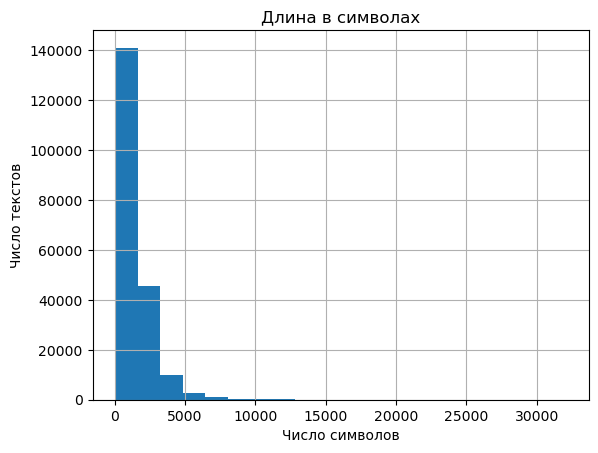

In [ ]:
df['lenght_in_char'] = df['text'].apply(lambda x: len(x))
df['lenght_in_word'] = df['text'].apply(lambda x: len(process_text(x).split(' ')))
df['lenght_in_char'].hist(bins=20)
plt.title('Длина в символах')
plt.xlabel('Число символов')
plt.ylabel('Число текстов')
plt.show()

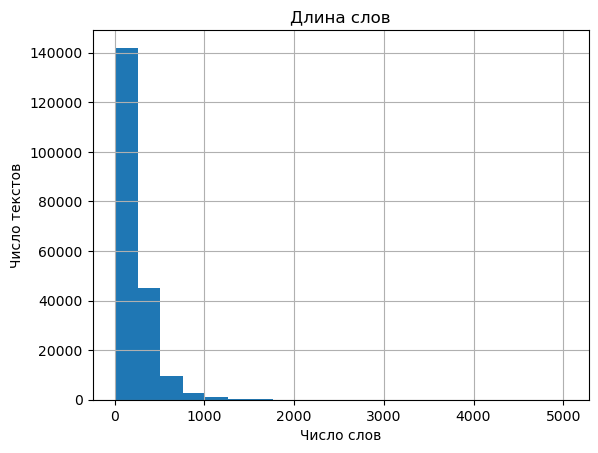

In [ ]:

df['lenght_in_word'].hist(bins=20)
plt.title('Длина слов')
plt.xlabel('Число слов')
plt.ylabel('Число текстов')
plt.show()

## 3. Найдите 10 самых частых слов

In [ ]:

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from collections import Counter

vocabul = [token for tweet in df['text'] for token in word_tokenize(tweet.lower()) if token not in punctuation]
print(len(vocabul))
freq_dict = Counter(vocabul)
freq_dict.most_common(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Антон\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


45061880


[('в', 1613491),
 ('и', 1304594),
 ('не', 1039930),
 ('на', 857555),
 ('что', 753015),
 ('я', 697234),
 ('с', 559536),
 ('по', 446944),
 ('мне', 388600),
 ('банка', 329946)]

In [ ]:
#Ищем слова без стоп - слов
nltk.download('stopwords')
noise = stopwords.words('russian') + list(punctuation) + ['``','\'\'', '...']
vocabul = [token.lower() for tweet in df['text'] for token in word_tokenize(tweet.lower()) if token not in noise]
print(len(vocabul))
freq_dict_ws = Counter(vocabul)
freq_dict_ws.most_common(10)

In [ ]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
#Топ 10 лемм
import pymorphy2
from tqdm import tqdm
morph = pymorphy2.MorphAnalyzer()

corpus_lem = []
for token in tqdm(vocabul):
    corpus_lem.append(morph.parse(token)[0].normal_form)
freq_dict = Counter(corpus_lem)
freq_dict.most_common(10)


100%|███████████████████████████████████████████████████████████████████| 28794140/28794140 [41:15<00:00, 11629.33it/s]


[('банк', 795956),
 ('карта', 400640),
 ('это', 246845),
 ('деньга', 216817),
 ('день', 207958),
 ('кредит', 205593),
 ('мой', 201006),
 ('который', 183081),
 ('счёт', 170479),
 ('отделение', 168285)]

In [ ]:
#Топ 10 существительных


morph = pymorphy2.MorphAnalyzer()

corpus_lem_noun = []
for token in tqdm(corpus_lem):
    p = morph.parse(token)[0]
    if 'NOUN' in p.tag:
        corpus_lem_noun.append(token)
freq_dict_noun = Counter(corpus_lem_noun)
freq_dict_noun.most_common(10)

100%|███████████████████████████████████████████████████████████████████| 28794140/28794140 [42:07<00:00, 11391.63it/s]


[('банк', 795956),
 ('карта', 400640),
 ('деньга', 216817),
 ('день', 207958),
 ('кредит', 205593),
 ('счёт', 170479),
 ('отделение', 168285),
 ('клиент', 168050),
 ('сотрудник', 165902),
 ('сумма', 138299)]

## Построить кривые Ципфа и Хикса

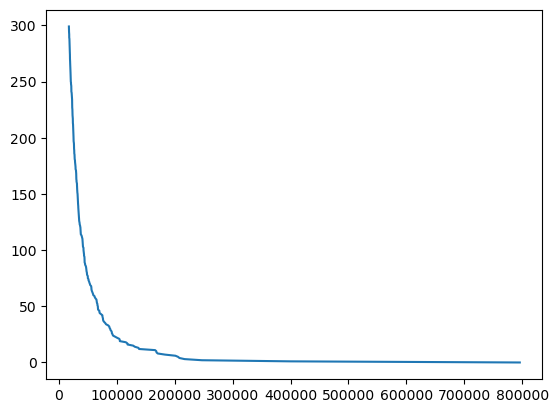

In [ ]:
#Кривая по закону Ципфа

freqs_cipf = list(freq_dict.values())
freqs_cipf = sorted(freqs_cipf, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs_cipf[:300], range(300))
plt.show()

100%|█████████████████████████████████████████████████████████████████████████| 201030/201030 [11:45<00:00, 284.75it/s]


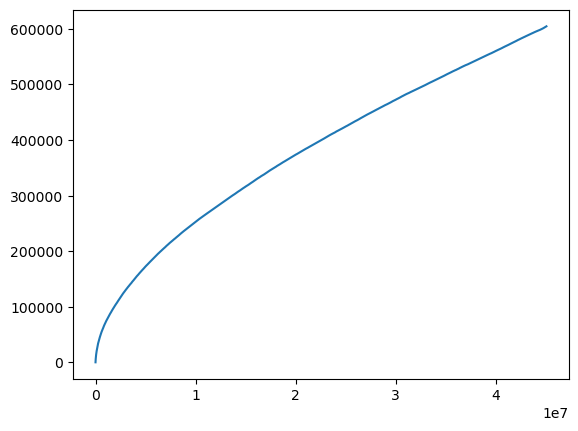

In [ ]:
#Кривая по закону Хипса
cnt = Counter()
n_words = []
n_tokens = []
tokens = []
for row in tqdm(df['text']):
    tokens = word_tokenize(row)
    cnt.update([token for token in tokens if token not in punctuation])
    n_words.append(len(cnt))
    n_tokens.append(sum(cnt.values()))
fig, ax = plt.subplots()
ax.plot(n_tokens, n_words)
plt.show()

## Ответить на вопросы

In [ ]:
# какое слово встречается чаще, "сотрудник" или "клиент"
employee = freq_dict['сотрудник']
client = freq_dict['клиент']
print("employee vs client: "+str(employee)+" vs "+str(client))
print("Чаще встречается: "+( "слово сотрудник"  if (employee>client) else 'оба слова встречаются в равной мере' if (employee==client)  else 'слово клиент'))

employee vs client: 165902 vs 168050
Чаще встречается: слово клиент


In [ ]:
#сколько раз встречается слова "мошенничество" и "доверие"
mosh = freq_dict['мошенничество']
trust = freq_dict['доверие']
print("Мошенничество встречается "+str(mosh)+" раз")
print("Доверие встречается "+str(trust)+" раз")

Мошенничество встречается 3870 раз
Доверие встречается 2721 раз


## Поиск слов в положительных и отрицательных отзывах

In [ ]:
#Ищем ключевые слова для сообщений с оценкой 1
data_1 = df[df['rating_grade'].isin([1])]
from string import punctuation
from nltk.tokenize import word_tokenize
import nltk

import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
import pymorphy2

morph = pymorphy2.MorphAnalyzer()
noise = stopwords.words('russian') + list(punctuation) + ['``','\'\'', '...']
tweets = []
for tweet in data_1['text']:
    s = ''
    for token in word_tokenize(tweet.lower()):
        if token not in noise:
            s += morph.parse(token)[0].normal_form + ' '
    tweets.append(s)


tfidf = TfidfVectorizer(ngram_range=(1, 2))
tfidf_tweets = tfidf.fit_transform(tweets)
ind = np.argsort(tfidf_tweets.mean(axis=0).tolist()[0])
tfidf.get_feature_names_out()[ind[-30:]]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Антон\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Антон\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['номер', 'телефон', 'время', 'ваш', 'вопрос', 'сбербанк', 'то',
       'договор', 'звонить', 'кредитный', 'свой', 'вклад', 'банкомат',
       'платёж', 'год', 'сказать', 'сумма', 'заявление', 'клиент',
       'который', 'сотрудник', 'мой', 'отделение', 'счёт', 'день', 'это',
       'деньга', 'кредит', 'карта', 'банк'], dtype=object)

In [ ]:
#Ищем ключевые слова для сообщений с оценкой 5
data_5 = df[df['rating_grade'].isin([5])]
morph = pymorphy2.MorphAnalyzer()
noise = stopwords.words('russian') + list(punctuation) + ['``','\'\'', '...']
tweets = []
for tweet in data_5['text']:
    s = ''
    for token in word_tokenize(tweet.lower()):
        if token not in noise:
            s += morph.parse(token)[0].normal_form + ' '
    tweets.append(s)
tfidf = TfidfVectorizer(ngram_range=(1, 2))
tfidf_tweets = tfidf.fit_transform(tweets)
ind = np.argsort(tfidf_tweets.mean(axis=0).tolist()[0])
tfidf.get_feature_names_out()[ind[-30:]]

array(['сказать', 'документ', 'такой', 'работать', 'быстро', 'кредитный',
       'проблема', 'хотеть', 'свой', 'время', 'счёт', 'обслуживание',
       'работа', 'мой', 'спасибо', 'вопрос', 'который', 'год', 'деньга',
       'офис', 'день', 'это', 'отделение', 'клиент', 'сотрудник', 'вклад',
       'очень', 'кредит', 'карта', 'банк'], dtype=object)

# Часть 2. Анализ текстов

In [ ]:
# Подготовка данных
import pymorphy2
from tqdm import tqdm
morph = pymorphy2.MorphAnalyzer()
from string import punctuation
from nltk.tokenize import word_tokenize
import nltk
#!pip install turicreate
import numpy as np
nltk.download('punkt')
nltk.download('stopwords')
#from turicreate import SFrame
from joblib import Parallel, delayed
noise = stopwords.words('russian') + list(punctuation) + ['``','\'\'', '...']
tweets = []
cache_dict={}
for tweet in tqdm(df['text']):
    s = []
    for token in word_tokenize(tweet.lower()):
        if (token not in noise) & (not token.isnumeric()):
            #Параллелизация
            #x = Parallel(n_jobs=4)(delayed(word_tokenize)(line) for line in lines)
            #
            if not token in cache_dict:
                ftoken=morph.parse(token)[0].normal_form
                cache_dict[token]=ftoken
                s.append(ftoken) # Лемматизация
            else:
                s.append(cache_dict[token])
            #s.append(token) #Без лемматизации
    tweets.append(s)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Антон\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Антон\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|█████████████████████████████████████████████████████████████████████████| 201030/201030 [06:41<00:00, 500.42it/s]


In [ ]:
# 2.1 Постройте несколько тематических моделей коллекции документов с разным числом тем
from gensim.corpora import Dictionary

dict_tw = Dictionary(tweets)
corpus = [dict_tw.doc2bow(tweet) for tweet in tweets if len(tweet) > 5]
print(dict_tw)

Dictionary<300715 unique tokens: ['анатолиевич', 'банк', 'бесплатно', 'благодарность', 'брать']...>


In [ ]:
#LSI анализ - 30 тем

from gensim.models import TfidfModel, lsimodel


num_topics = 50
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dict_tw, num_topics=num_topics)

In [ ]:
lsi.show_topics(num_topics*2)

In [ ]:
from gensim.models import LdaModel


# Make an index to word dictionary.
temp = dict_tw[0]  # This is only to "load" the dictionary.
id2word = dict_tw.id2token

lda = LdaModel(
    corpus=corpus,
    id2word=dict_tw,
    num_topics=num_topics,
    )


In [ ]:
lda.print_topics(num_topics=num_topics, num_words=7)

[(0,
  '0.203*"русский" + 0.184*"стандарт" + 0.097*"рс" + 0.039*"сберкнижка" + 0.033*"сергей" + 0.019*"отец" + 0.018*"карман"'),
 (1,
  '0.036*"система" + 0.033*"пароль" + 0.032*"код" + 0.026*"интернет" + 0.023*"проблема" + 0.018*"телебанк" + 0.017*"доступ"'),
 (2,
  '0.063*"деньга" + 0.060*"офис" + 0.050*"филиал" + 0.024*"получить" + 0.022*"банк" + 0.020*"понедельник" + 0.017*"пятница"'),
 (3,
  '0.043*"допофис" + 0.041*"юлия" + 0.029*"марина" + 0.026*"коллектив" + 0.024*"сокол" + 0.023*"бинбанка" + 0.023*"мария"'),
 (4,
  '0.047*"банк" + 0.041*"мой" + 0.016*"сотрудник" + 0.013*"который" + 0.012*"претензия" + 0.011*"рф" + 0.010*"право"'),
 (5,
  '0.152*"автокредит" + 0.116*"автомобиль" + 0.094*"автосалон" + 0.070*"птс" + 0.065*"авто" + 0.049*"екатерина" + 0.041*"дмитрий"'),
 (6,
  '0.054*"отделение" + 0.043*"сотрудник" + 0.033*"банк" + 0.030*"информация" + 0.022*"вопрос" + 0.019*"дать" + 0.017*"получить"'),
 (7,
  '0.111*"мы" + 0.068*"наш" + 0.038*"муж" + 0.026*"год" + 0.026*"жена" + 

In [ ]:
list(dict_tw.values()).index('документ')

19

In [ ]:
#Поищем понятные, интерпретируемые темы
topics=lda.get_term_topics(list(dict_tw.values()).index('документ'), minimum_probability=None)
print(topics)
#lda.print_topics(topics)

[(9, 0.017012566), (25, 0.09501145), (31, 0.0750113)]


In [ ]:
for topic_data in topics:
    print(lda.print_topic(topic_data[0]))

0.103*"кредит" + 0.050*"банк" + 0.017*"документ" + 0.017*"кредитный" + 0.015*"заявка" + 0.014*"сумма" + 0.012*"сказать" + 0.012*"взять" + 0.011*"справка" + 0.011*"оформить"
0.096*"документ" + 0.058*"письмо" + 0.045*"почта" + 0.044*"паспорт" + 0.043*"копия" + 0.023*"выписка" + 0.022*"электронный" + 0.019*"отправить" + 0.019*"подпись" + 0.015*"справка"
0.075*"документ" + 0.059*"квартира" + 0.052*"сделка" + 0.036*"ипотечный" + 0.035*"ипотека" + 0.027*"менеджер" + 0.023*"кредит" + 0.016*"продавец" + 0.015*"залог" + 0.012*"кредитование"


Вполне понятные темы - документы и их типы,а также связанные с ним действия

In [ ]:
topics=lda.get_term_topics(list(dict_tw.values()).index('банкомат'), minimum_probability=None)
print(topics)
for topic_data in topics:
    print(lda.print_topic(topic_data[0]))

[(20, 0.1958029), (26, 0.10549757)]
0.198*"банкомат" + 0.135*"работать" + 0.054*"росбанк" + 0.050*"город" + 0.028*"коммунальный" + 0.026*"торговый" + 0.026*"факс" + 0.024*"магазин" + 0.024*"точка" + 0.024*"центр"
0.105*"банкомат" + 0.079*"деньга" + 0.017*"карта" + 0.015*"снять" + 0.015*"купюра" + 0.015*"банк" + 0.014*"день" + 0.014*"чек" + 0.014*"выдать" + 0.013*"сумма"


Тоже вполне понятные темы -  банкоматы и их месторасположение в первом случае, а также связанные предметы во втором

## 3. Классификация текстов

In [ ]:
#3.1. Составьте обучающее и тестовое множество: выберите из всего набора данных N1 отзывов с оценкой 1 и N2 отзывов с оценкой
#5. Используйте sklearn.model_selection.train_test_split для разделения множества отобранных документов на обучающее и тестовое

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
df_classification = df[df['rating_grade'].isin([1, 5])]
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder().fit(df_classification['rating_grade'])
print(le.classes_)
y = le.transform(df_classification['rating_grade'])
X = df_classification['text']


X.head()

[1. 5.]


0     Здравствуйте!  Хотелось бы выразить благодарно...
3     1 июня 2015 в Москве в отделении по адресу Смо...
4     История очень долгая! Пришел я в банк (это раз...
9     Хочу поблагодарить Надежду из отдела по ипотеч...
10    В ИнтерБыстробанке удобно оплачивать ком. плат...
Name: text, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [ ]:
#Векторизация с помощью униграм
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(X_train) # bag of words

In [ ]:
clf = LogisticRegression(random_state=11,max_iter=500,verbose=True)
clf.fit(bow, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.7s finished


LogisticRegression(max_iter=500, random_state=11, verbose=True)

In [ ]:
from sklearn.metrics import classification_report

pred = clf.predict(vec.transform(X_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     14556
           1       0.93      0.95      0.94      5249

    accuracy                           0.97     19805
   macro avg       0.96      0.96      0.96     19805
weighted avg       0.97      0.97      0.97     19805



In [ ]:
#С помощью пар слов
vec = CountVectorizer(ngram_range=(1, 2))
bow = vec.fit_transform(X_train) # bag of words
clf = LogisticRegression(random_state=11,max_iter=500,verbose=True)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(X_test))
print(classification_report(pred, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min finished


              precision    recall  f1-score   support

           0       0.99      0.97      0.98     14637
           1       0.93      0.97      0.95      5168

    accuracy                           0.97     19805
   macro avg       0.96      0.97      0.97     19805
weighted avg       0.97      0.97      0.97     19805



In [ ]:
#С помощью троек слов
vec = CountVectorizer(ngram_range=(1, 3))
bow = vec.fit_transform(X_train) # bag of words
clf = LogisticRegression(random_state=11,max_iter=500,verbose=True)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(X_test))
print(classification_report(pred, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.0min finished


              precision    recall  f1-score   support

           0       0.99      0.97      0.98     14661
           1       0.93      0.97      0.95      5144

    accuracy                           0.97     19805
   macro avg       0.96      0.97      0.97     19805
weighted avg       0.97      0.97      0.97     19805



In [ ]:
#Символьные триграммы
vec = CountVectorizer(ngram_range=(3, 3),analyzer='char')
bow = vec.fit_transform(X_train) # bag of words
clf = LogisticRegression(random_state=11,max_iter=500,verbose=True)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(X_test))
print(classification_report(pred, y_test))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.7s finished


              precision    recall  f1-score   support

           0       0.97      0.97      0.97     14439
           1       0.92      0.92      0.92      5366

    accuracy                           0.96     19805
   macro avg       0.94      0.94      0.94     19805
weighted avg       0.96      0.96      0.96     19805



In [ ]:
#3.4. Сравните, как изменяется качество решения задачи при использовании скрытых тем в качестве признаков:
#1-ый вариант: $tf-idf$ преобразование (sklearn.feature_extraction.text.TfidfTransformer) и сингулярное разложение (оно же – латентый
#семантический анализ) (sklearn.decomposition.TruncatedSVD),
#2-ой вариант: тематические модели LDA (sklearn.decomposition.LatentDirichletAllocation).
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD,LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
#Сначала первый вариант
vocabulary = list(dict_tw.values())
print(dict_tw.values)

<bound method Mapping.values of <gensim.corpora.dictionary.Dictionary object at 0x00000192437F3C10>>


In [ ]:
clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 1), vocabulary=vocabulary)),
    ('tfidf', TfidfTransformer()),
    ('tm', TruncatedSVD(n_components=30, n_iter=7, random_state=11)),
    ('clf', LogisticRegression(random_state=11, max_iter=500, solver='liblinear'))
])
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     15123
           1       0.78      0.90      0.84      4682

    accuracy                           0.92     19805
   macro avg       0.88      0.91      0.89     19805
weighted avg       0.92      0.92      0.92     19805



In [ ]:
vocabulary = list(dict_tw.values())
clfd = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1, 1), vocabulary=vocabulary)),
    ('tm', LatentDirichletAllocation(n_components=30, random_state=11)),
    ('clf', LogisticRegression(random_state=11, max_iter=500, solver='liblinear'))
])
clfd.fit(X_train, y_train)
pred = clfd.predict(X_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     15200
           1       0.78      0.92      0.85      4605

    accuracy                           0.92     19805
   macro avg       0.88      0.92      0.90     19805
weighted avg       0.93      0.92      0.92     19805



LDA на 500 итерациях логистической регрсессии оказалось немного точнее